Create a book recommendation algorithm using K-Nearest Neighbors.

Use the Book-Crossings dataset http://www2.informatik.uni-freiburg.de/~cziegler/BX/. This dataset contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users.

In [1]:
# import libraries 
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [4]:
# get data files
!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [6]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [7]:
# Explore books dataset
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [8]:
# Explore ratings dataset
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


<AxesSubplot:>

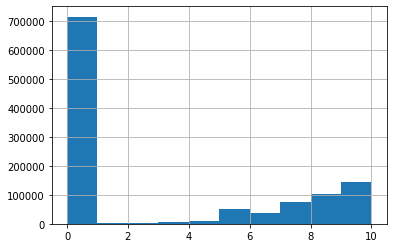

In [9]:
# Combine books and ratings dataframe and visualize book ratings
df_book_ratings = pd.merge(df_books, df_ratings, on='isbn', how='outer')
df_book_ratings.rating.hist(bins=10)

In [11]:
# Clean data: remove from the dataset users with less than 200 ratings and books with less than 100 ratings
df_ratings['user_ratings_count'] = df_ratings.groupby('user').rating.transform('count')
df_ratings['title_ratings_count'] = df_ratings.groupby('isbn').rating.transform('count')
filtered_ratings = df_ratings[(df_ratings.user_ratings_count >= 200) & (df_ratings.title_ratings_count >= 100)][['isbn', 'user', 'rating']]
df_book_ratings = pd.merge(filtered_ratings, df_books, on='isbn')

In [12]:
# Drop duplicates from filtered data
filtered_book_ratings = df_book_ratings.drop_duplicates(['title', 'user'], keep='first')